In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading cifar10 dataset:
from tensorflow.keras.datasets import cifar10

In [5]:
#1: splitting train and test dataset:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
# x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [7]:
single_image = x_train[0]
# single_image
single_image.shape

(32, 32, 3)

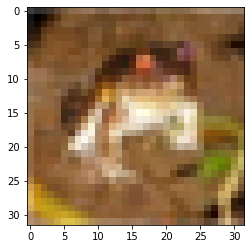

In [8]:
plt.imshow(single_image)

In [9]:
#2: preprocessing:
# single_image.max()
x_test.max()

255

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# y_test.shape
y_test #as we see bellow, these are labeled by intigers, so we should convert it catagorial data.

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_catagory = to_categorical(y_train, 10)
y_test_catagory = to_categorical(y_test, 10)

In [14]:
# y_train_catagory.shape
y_train_catagory #as we see bellow, this is one-hot-encoding.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_catagory #as we see bellow, this is one-hot-encoding.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
#just a quick comprehension of our data:
y_train[0]

array([6], dtype=uint8)

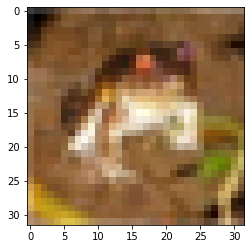

In [17]:
plt.imshow(x_train[0]) #so as we see bellow and above, output '6' is liked to the picture of a 'frog', which if we google it,we see that in cifar10, the image of a 'frog' is ultimately labeled as '6'.
#here is the link: https://www.cs.toronto.edu/~kriz/cifar.html

In [18]:
#3: creating our model:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

#Convolutional Layer:
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), input_shape = (32, 32, 3), activation = 'relu')) 
#input_shape = (32, 32, 3) : by x_test.shape
#for an mnist imge(which is a gray-scaled image): 28*28 = 784, for a cifar10 image(which is a color image): 32*32*3 = 3072, !huge difference!
#so since the images in cifar10 hold more information compared to mnist images, we will add another convolutional layer:
#Pooling layer:
model.add(MaxPool2D(pool_size = (2, 2))) 


#Convolutional Layer:
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), input_shape = (32, 32, 3), activation = 'relu')) 
#many like to change 'filters' to another number in the latter convolutional Layere in CNN. But here, I keep it the same.
#Pooling layer:
model.add(MaxPool2D(pool_size = (2, 2))) 


#Flatting the image:
model.add(Flatten())


#Now the ANN after the CNN:
model.add(Dense(units = 256, activation = 'relu')) 
#since here we have more complex images than mnist images, it is better to add more nuorons to the Dense layer.
model.add(Dense(units = 10, activation = 'softmax')) #output layer
#units = 10 : since we have 10 classes according to the link I sent in the above lines.\
#activation = 'softmax' : not 'sigmoid', since this is a multi-class(=10) netwok.


#Compiling the model:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [21]:
#4: EarlyStopping to avoid overfitting:
    
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [22]:
model.fit(x = x_train, y = y_train_catagory, epochs = 15, validation_data = [x_test, y_test_catagory], callbacks = [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 100s 2ms/sample - loss: 1.4686 - accuracy: 0.4729 - val_loss: 1.2253 - val_accuracy: 0.5572
Epoch 2/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.1400 - accuracy: 0.5969 - val_loss: 1.1211 - val_accuracy: 0.6152
Epoch 3/15
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.9931 - accuracy: 0.6521 - val_loss: 1.0669 - val_accuracy: 0.6273
Epoch 4/15
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.8857 - accuracy: 0.6910 - val_loss: 0.9464 - val_accuracy: 0.6706
Epoch 5/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.7876 - accuracy: 0.7244 - val_loss: 0.9336 - val_accuracy: 0.6783
Epoch 6/15
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.7127 - accuracy: 0.7521 - val_loss: 0.9757 - val_accuracy: 0.6751
Epoch 7/15
50000/50000 [==============================

In [24]:
metrics = pd.DataFrame(model.history.history)#I used 'metrics' name instead of 'losses' name, since the output of "model.history.history" is not just 'loss' & 'val_loss', but also it contains other related metrics (because above, I have said in the code "metrics = ['accuracy']", so the code basically adds accuracy related metrics, too.)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.468562,0.47292,1.225299,0.5572
1,1.139993,0.59688,1.121109,0.6152
2,0.993076,0.65206,1.066909,0.6273
3,0.885674,0.69100,0.946356,0.6706
4,0.787643,0.72436,0.933581,0.6783
5,0.712658,0.75208,0.975699,0.6751
6,0.636959,0.77812,0.966517,0.6828


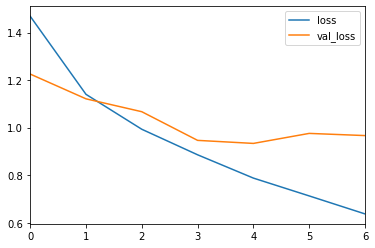

In [25]:
metrics[['loss', 'val_loss']].plot()

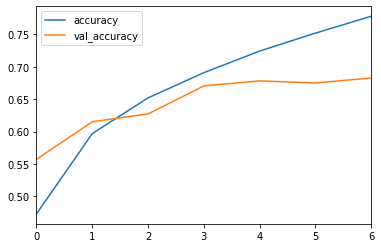

In [26]:
metrics[['accuracy', 'val_accuracy']].plot()

In [27]:
# 5: evaluating our model:

model.evaluate(x = x_test, y = y_test_catagory, verbose = 0) #the output's element [0]=0.038617865503154464='loss' & [1]=0.9888]='accuracy'.

[0.9665166018486023, 0.6828]

In [36]:
#to further evaluate our model, we ise confusion matrix, ...

from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

# if the classification report for rows 3(=cat) and 5(=dog) became quite simillar and equal, then that is because a dog and a cat look quite similar for such blury images that we have in cifar10. 

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.82      0.77      0.79      1000
           2       0.57      0.60      0.58      1000
           3       0.50      0.48      0.49      1000
           4       0.64      0.62      0.63      1000
           5       0.58      0.58      0.58      1000
           6       0.75      0.79      0.77      1000
           7       0.80      0.67      0.73      1000
           8       0.76      0.80      0.78      1000
           9       0.67      0.84      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [37]:
confusion_matrix(y_true = y_test, y_pred = predictions)

array([[678,  22,  63,  22,  22,  12,  14,  14,  87,  66],
       [ 22, 772,   5,   7,   6,   5,  11,   0,  33, 139],
       [ 48,   9, 596,  72,  71,  73,  65,  22,  18,  26],
       [ 10,  13,  83, 482,  79, 186,  72,  22,  25,  28],
       [ 17,   5, 113,  66, 618,  38,  53,  59,  20,  11],
       [ 13,   4,  55, 186,  54, 581,  33,  32,  16,  26],
       [  7,   7,  51,  58,  30,  26, 793,   5,  10,  13],
       [ 12,   7,  57,  48,  73,  71,  14, 670,   4,  44],
       [ 64,  38,  10,  10,   9,   7,   5,   2, 802,  53],
       [ 19,  67,  15,  11,   0,   5,   3,   7,  37, 836]], dtype=int64)

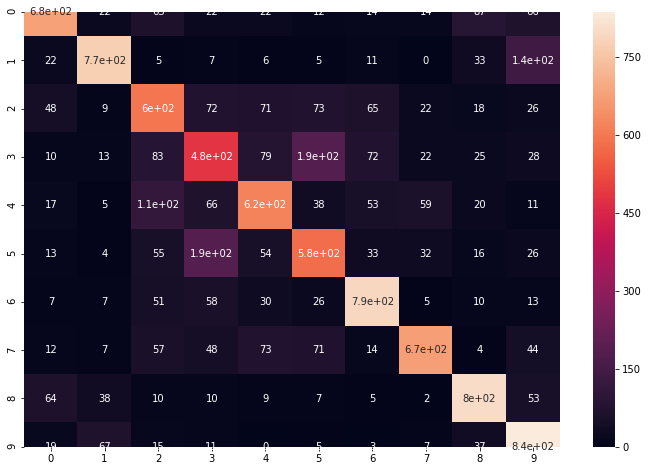

In [38]:
#visualising the above confusuion matrix:
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = predictions), annot = True) 

#so as we see bellow, there seems to be some confusion with 3(=cat) and 5(=dog)!

In [39]:
#6: predicting a single image:

a_single_image = x_test[0] #which is an image from the test dataset.

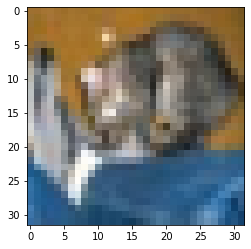

In [40]:
plt.imshow(a_single_image)

#so as we see bellow, we don't know what on earth this image is! therefore, we check the according test data, which in this case is y_test[0].

In [41]:
y_test[0] 

#as we see bellow, the label for the  above image is '3', which according to the the link I sent, is a 'cat'!

array([3], dtype=uint8)

In [42]:
model.predict_classes(a_single_image.reshape(1, 32, 32, 3)) #now, we should reshape our single image which we is going to be predicted by pur model:

array([3], dtype=int64)

In [ ]:
#bravo! our CNN model has predicted correct! it is '3', or a 'cat'!